In [2]:
from keras.datasets import imdb


# The argument num_words=10000 means to only keep the top 10,000 most frequently occurring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Each review is a list of word indices (encoding a sequence of words); each reviews are lists of 0s and 1s,
# where 0 stands for negative and 1 stands for positive
print('train data 0: ', train_data[0])
print('train label 0: ', train_labels[0])
print('max:', max([max(sequence) for sequence in train_data]))

train data 0:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train label 0:  1
max: 9999


In [3]:
# Decode reviews back to English
# Note:  0, 1, and 2 are reserved indices for "padding", "start of sequence" and "unknown".
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [10]:
"""
You can’t feed lists of integers into a neural network. You have to turn your lists into tensors. There are two ways:
-- 1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices),
      and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer)
-- 2. One-hot encode your lists to turn them into vectors of 0s and 1s.
"""
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(x_train[0], y_train[0])

print(np.shape(x_train), type(x_train))
print(np.shape(y_train), type(y_train))
print(np.shape(train_data), type(train_data), np.shape(train_data[0]), type(train_data[0]))
print(np.shape(test_data),  type(test_data),  np.shape(test_data[0]), type(test_data[0]))

[0. 1. 1. ... 0. 0. 0.] 1.0
(25000, 10000) <class 'numpy.ndarray'>
(25000,) <class 'numpy.ndarray'>
(25000,) <class 'numpy.ndarray'> (218,) <class 'list'>
(25000,) <class 'numpy.ndarray'> (68,) <class 'list'>


In [11]:
"""
Why activation functions are they necessary?

1. Without an activation function like relu (also called a non-linearity), the Dense layer would consist of two linear operations — a dot
   product and an addition: output = dot(W, input) + b. So the layer could only learn linear transformations (affine transformations)
   of the input data: the hypothesis space of the layer would be the set of all possible linear transformations of the input data into
   a 16-dimensional space. Such a hypothesis space is too restricted and wouldn’t benefit from multiple layers of representations,
   because a deep stack of linear layers would still implement a linear operation: adding more layers wouldn’t extend the hypothesis space.

2. In order to get access to a much richer hypothesis space that would benefit from deep representations, you need a non-linearity, or
   activation function. relu is the most popular activation function in deep learning, but there are many other candidates,
   which all come with similarly strange names: prelu, elu, and so on.
"""
from keras import models
from keras import layers
from keras import optimizers


# The model definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model
#model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy',
#              metrics=['acc'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Create a validation set by setting apart 10,000 samples from the original training data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 204us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_ac

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


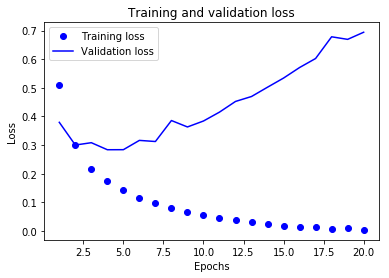

In [14]:
import matplotlib.pyplot as plt

# The history object has a member history, which is a dictionary containing data about everything that happened during training
# The dictionary contains four entries: one per metric that was being monitored during training and during validation
history_dict = history.history
print(history_dict.keys())

# training & validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')   # blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  #blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

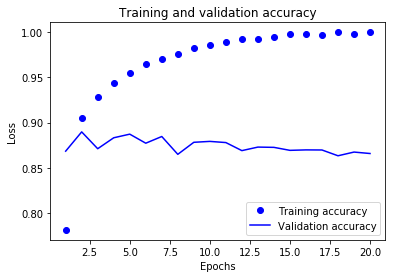

In [15]:
# clear figure
plt.clf()

# training & validation accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')   # blue dot
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')  #blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

# final result on test data: loss and accuracy 
result = model.evaluate(x_test, y_test)
print(result)

# using a trained model to predict on new data
y_hat_test = model.predict(x_test)
print(y_hat_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.4789 - acc: 0.8182
Epoch 2/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.2718 - acc: 0.9061
Epoch 3/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.2049 - acc: 0.9270
Epoch 4/4
25000/25000 [==============================] - 1s 47us/step
[0.3034434634971619, 0.87892]
[[0.17246377]
 [0.9997451 ]
 [0.63025707]
 ...
 [0.11426803]
 [0.05318733]
 [0.53936553]] [0. 1. 1. ... 0. 0. 0.]


In [ ]:
"""
Summary of this Example:

1. You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network.
   Sequences of words can be encoded as binary vectors, but there are other encoding options, too.

2. Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely
   use them frequently.
   
3. In a binary classification problem (two output classes), your network should end with a Dense layer with one unit and a sigmoid
   activation: the output of your network should be a scalar between 0 and 1, encoding a probability.

4. With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy.

5. The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.

6. As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results
   on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set. 
"""